# Modeling study with MARS and neural networks

Guillaume Thibault 

`Using Python`


Aims to study the relationship between 11 quality of life indicators and the value of a residence

### Dependencies

In [10]:
!python --version

Python 3.8.10


In [ ]:
!pip install pandas numpy pyearth plotly scikit-learn

In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

In [8]:
import pandas as pd 
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression 
from pyearth import Earth 
import plotly.graph_objects as go
import plotly.express as px 

### Data
The file of 506 observations is divided into 2 groups
* GROUP = M for Model development (405 observations: 80% of the observations) the M data are highlighted (green) and constitute a filter; the statistical modeling is based on these data (405 obs.) see Tools...selections conditions...edit
* GROUP = T for Testing the model (101 observations: 20% of observations) to include this group in an analysis, edit the filter


INDICATORS
* X1 CRIM : CRIMe Rate Per Capita by town
* X2 NOX : Nitric OXide concentration (parts per 10 million)
* X3 AGE: Proportion of owner occupied units built prior to 1940
* X4 DIS: Weighted DIStances to five Boston employment centers
* X5 RM: Average number of RooMs per dwelling
* X6 LSTAT: % of the Lower STATus of the population
* X7 RAD : Index of accessibility to RADical highways
* X8 CHAS : CHASrles river dummy variable (1 if census tract bounds the river; 0 otherwise)
* X9 INDUS : Proportion of non-retail INDUStrial business acres per town
* X10 TAX : Full value property TAX rate per $10,000
* X11 PT : Pupil-Teacher ratio by town
* RLZ : Proportion of Residential Land Zoned for lots over 25,000 sq.ft.
 available in the file but will not be used


RESPONSE
* Y_MV : Median Value of owner occupied homes (in $1000's)

The models will be developed with the M group of 406 observations.

In [9]:
df = pd.read_csv('data.csv')

df.head()

,CT,X1_CRIM,X2_NOX,X3_AGE,X4_DIS,X5_RM,X6_LSTAT,X7_RAD,X8_ CHAS,X9_NDUS,X10_TAX,X11_PT,Y_MV,GROUP,X12_RLZ
0,1,0.00632,0.538,65.2,4.0900,6.575,4.98,1,0,2.31,296,15.3,24.0,M,18.0
1,2,0.02731,0.469,78.9,4.9671,6.421,9.14,2,0,7.07,242,17.8,21.6,T,0.0
2,3,0.02729,0.469,61.1,4.9671,7.185,4.03,2,0,7.07,242,17.8,34.7,M,0.0
3,4,0.03237,0.458,45.8,6.0622,6.998,2.94,3,0,2.18,222,18.7,33.4,M,0.0
4,5,0.06905,0.458,54.2,6.0622,7.147,5.33,3,0,2.18,222,18.7,36.2,M,0.0


### Let's explore MARS Regression first

In [18]:
# Create a scatter plot
fig = px.scatter(df, x=df['X6_LSTAT'], y=df['Y_MV'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="Scatter Plot")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()


In [24]:
# --- Select variables to use in the two models --- 
# Note, we need X to be a 2D array, hence reshape
X=df['X6_LSTAT'].values.reshape(-1,1)
y=df['Y_MV'].values

# --- Define and fit the two models ---
model1 = LinearRegression() 
model2 = Earth(max_terms=500, max_degree=1) # note, terms in brackets are the hyperparameters 

LR = model1.fit(X, y)
MARS = model2.fit(X, y)

# --- Print model summary ---
# LR
print("Simple Linear Regression Model")
print("--------------------------------------")
print("Intercept: ", LR.intercept_)
print("Slope: ", LR.coef_)

print("")
print("")

# MARS
print(MARS.summary())

Simple Linear Regression Model
--------------------------------------
Intercept:  34.5538408793831
Slope:  [-0.95004935]


Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      11.9581      
h(x0-6.12)      Yes     None         
h(6.12-x0)      No      4.11806      
h(x0-22.74)     Yes     None         
h(22.74-x0)     No      0.87503      
x0              Yes     None         
-------------------------------------
MSE: 26.4084, GCV: 27.0460, RSQ: 0.6872, GRSQ: 0.6809


In [27]:

# ----- Create data for Linear Regression line -----
# Create 20 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 20) 

# Predict y values for our set of X values
y_range = model1.predict(x_range.reshape(-1, 1))


# ----- Create data for MARS model line -----
# Select a few points including the 3 major ones: min, max and hinge
x_mars = np.array([X.min(), 5, 10, 15, 20, 25, 30, 35, X.max()])

# Predict y values for our set of X values
y_mars = model2.predict(x_mars.reshape(-1, 1))


# ----- Create a scatter plot -----
fig = px.scatter(df, x=df['X6_LSTAT'], y=df['Y_MV'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_mars, y=y_mars, name='MARS', line=dict(color='red')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="Linear Regression vs. MARS")

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

#### Two variables

In [28]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X6_LSTAT'], y=df['X3_AGE'], z=df['Y_MV'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [29]:

# ----- Select variables that we want to use in a model -----
# Note, X in this case is already a 2D array, hence no reshape
X=df[['X6_LSTAT','X3_AGE']]
y=df['Y_MV'].values

# ----- Define and fit the two models -----
model1 = LinearRegression()
model2 = Earth()

LR = model1.fit(X, y)
MARS = model2.fit(X, y)

# ----- Print model summary -----
# LR
print("Simple Linear Regression Model")
print("--------------------------------------")
print("Intercept: ", LR.intercept_)
print("Slope: ", LR.coef_)

print("")

print("")

# MARS
print(MARS.summary())


Simple Linear Regression Model
--------------------------------------
Intercept:  33.2227605317929
Slope:  [-1.03206856  0.03454434]


Earth Model
----------------------------------------
Basis Function     Pruned  Coefficient  
----------------------------------------
(Intercept)        No      -59.2357     
h(X6_LSTAT-6.12)   No      4.25796      
h(6.12-X6_LSTAT)   Yes     None         
h(X6_LSTAT-22.74)  No      -4.21402     
h(22.74-X6_LSTAT)  No      5.23979      
X3_AGE             Yes     None         
h(X3_AGE-54.4)     Yes     None         
h(54.4-X3_AGE)     No      -0.109485    
h(X3_AGE-77.7)     Yes     None         
h(77.7-X3_AGE)     Yes     None         
----------------------------------------
MSE: 24.9447, GCV: 26.0656, RSQ: 0.7045, GRSQ: 0.6925


In [31]:
X

,X6_LSTAT,X3_AGE
0,4.98,65.2
1,9.14,78.9
2,4.03,61.1
3,2.94,45.8
4,5.33,54.2
...,...,...
501,9.67,69.1
502,9.08,76.7
503,5.64,91.0
504,6.48,89.3


In [30]:
# Increments between points in a meshgrid
mesh_size = 10

# Identify min and max values for input variables
x_min, x_max = X['X6_LSTAT'].min(), X['X6_LSTAT'].max()
y_min, y_max = X['X3_AGE'].min(), X['X3_AGE'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# Predict using LR model
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Predict using MARS model
pred_MARS = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_MARS = pred_MARS.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# we need to reshape it to be the same shape as xx or yy to be able to display it on a graph

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [32]:

# Create a 3D scatter plot with predictions
fig = px.scatter_3d(df, x=df['X6_LSTAT'], y=df['X3_AGE'], z=df['Y_MV'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with Linear Regression Prediction Surface",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=3))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_LR, name='LR'))

fig.show()

In [33]:

# Create a 3D scatter plot with predictions
fig = px.scatter_3d(df, x=df['X6_LSTAT'], y=df['X3_AGE'], z=df['Y_MV'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title and colors
fig.update_layout(title_text="Scatter 3D Plot with MARS Prediction Surface",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))
# Update marker size
fig.update_traces(marker=dict(size=3))

# Add prediction plane
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_MARS, name='MARS', ))
                          #colorscale=px.colors.sequential.Viridis))

fig.show()

### Split the Data

In [66]:
train = df[(df['GROUP'] == 'M')]
test  = df[(df['GROUP'] == 'T')]

### MARS Regression

In [67]:
# ----- Select variables that we want to use in a model -----
# Note, X in this case is already a 2D array, hence no reshape
X=train[['X1_CRIM',	'X2_NOX', 'X3_AGE',	'X4_DIS', 'X5_RM', 'X6_LSTAT', 'X7_RAD', 'X8_ CHAS', 'X9_NDUS',	'X10_TAX', 'X11_PT', 'X12_RLZ']]
y=train['Y_MV'].values

# ----- Define and fit the two models -----
model2 = Earth()
MARS = model2.fit(X, y)

# ----- Print model summary -----
print(MARS.summary())

Earth Model
-----------------------------------------
Basis Function      Pruned  Coefficient  
-----------------------------------------
(Intercept)         No      -142.352     
h(X6_LSTAT-6.73)    No      1.41752      
h(6.73-X6_LSTAT)    Yes     None         
h(X5_RM-6.436)      Yes     None         
h(6.436-X5_RM)      No      6.83293      
h(X4_DIS-1.4191)    No      59.3098      
h(1.4191-X4_DIS)    Yes     None         
h(X1_CRIM-11.9511)  No      0.711434     
h(11.9511-X1_CRIM)  Yes     None         
h(X5_RM-7.923)      No      -22.8533     
h(7.923-X5_RM)      Yes     None         
X11_PT              No      -0.588696    
X2_NOX              No      -18.2581     
X7_RAD              No      0.458926     
X10_TAX             No      -0.0141017   
h(X4_DIS-4.148)     No      -59.8795     
h(4.148-X4_DIS)     No      61.4698      
h(X5_RM-7.313)      No      16.0886      
h(7.313-X5_RM)      No      -6.90471     
h(X6_LSTAT-23.24)   No      -1.5288      
h(23.24-X6_LSTAT)   No

In [68]:
X_test=test[['X1_CRIM',	'X2_NOX', 'X3_AGE',	'X4_DIS', 'X5_RM', 'X6_LSTAT', 'X7_RAD', 'X8_ CHAS', 'X9_NDUS',	'X10_TAX', 'X11_PT', 'X12_RLZ']]
y_test=test['Y_MV'].values

y_hat = model2.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, y_hat)
print(f"R^2: {r2}")

mse = mean_squared_error(y_test, y_hat)
print(f"mse: {mse}")

R^2: 0.8645442767251401
mse: 10.25013628322174


### XGBoost

In [ ]:
!pip install xgboost

In [70]:
import xgboost as xgb

In [73]:
XGBModel = xgb.XGBRegressor()
XGBModel.fit(X, y, verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)

r2 = r2_score(y_test, XGBpredictions)
print(f"XGBoost validation R^2: {r2}")

mse = mean_squared_error(y_test, XGBpredictions)
print('XGBoost validation MSE = ', mse)

[02:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation R^2: 0.9035641553461248
XGBoost validation MSE =  7.297443964652917


### Neural networks

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
device = "cuda" if torch.cuda.is_available() else "cpu"
import time
import matplotlib.pyplot as plt

In [115]:
class HousingDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.df = data
        self.X = data[['X1_CRIM','X2_NOX','X3_AGE','X4_DIS','X5_RM','X6_LSTAT','X7_RAD','X8_ CHAS','X9_NDUS','X10_TAX','X11_PT','X12_RLZ']]
        self.y = data['Y_MV']
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        input = torch.tensor(self.X.iloc[idx].values, dtype=torch.float32).to(device)
        label = torch.tensor(self.y.iloc[idx], dtype=torch.float32).to(device)
        return input, label

In [116]:
train_mlp = train.sample(frac = 0.90)
valid_mlp = train.drop(train_mlp.index)
 
train_dataset = HousingDataset(train_mlp)
valid_dataset = HousingDataset(valid_mlp)
test_dataset  = HousingDataset(test)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2
)

valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=64, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False, num_workers=2
)

In [117]:
# Verif dataloader
for i, l in valid_loader:
    print(i.size())
    print(i.dtype)
    print(f"y: {l}")
    break

torch.Size([41, 12])
torch.float32
y: tensor([26.5000, 25.0000, 28.4000, 14.1000, 20.3000, 19.9000, 21.7000, 12.7000,
        31.0000, 50.0000, 33.2000, 22.0000, 31.7000,  5.0000, 36.2000, 18.4000,
        16.1000, 18.3000,  5.0000, 12.0000, 16.6000, 17.8000,  6.3000, 22.2000,
        27.5000, 28.7000, 19.2000, 41.7000,  8.7000, 13.8000, 12.8000,  8.5000,
        13.5000, 31.6000, 23.1000, 18.5000, 48.8000, 27.1000, 17.9000, 21.4000,
        42.8000])


In [118]:
def train_loop(epoch, model, train_loader, criterion, optimizer):
  train_loss = 0.
  model.train()
  for inputs, labels in train_loader:
      # Get input:
      inputs, labels = inputs.to(device), labels.to(device)

      # Zeros the parameter gradient
      optimizer.zero_grad()
      
      # Foward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # Get stats
      train_loss += loss.item()

  train_loss = train_loss / len(train_loader)

  print(f"Epoch: {epoch} | Train Loss: {train_loss:.6f}")
  return train_loss


def valid_loop(epoch, model, val_loader, criterion):
  val_acc = 0.
  val_loss = 0.
  model.eval()
  for inputs, labels in val_loader:
      # Get input:
      inputs, labels = inputs.to(device), labels.to(device)
      
      # Foward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)

      # Get stats
      val_loss += loss.item()

  val_loss = val_loss / len(val_loader)

  print(f"Epoch: {epoch} | Val Loss: {val_loss:.6f}")
  return val_loss

In [127]:
from torch.nn.modules.dropout import Dropout

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(12, 128),
            nn.ReLU(),
            nn.Dropout(p=0.05),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(p=0.05),
            nn.Linear(128, 1)
        )
    
    def forward(self, x):
        # x = x.flatten(start_dim=1)
        out = self.model(x)
        return out

In [128]:
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)


use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

train_losses, val_losses = [], []
n_epochs = 25

mlp = MLP().to(device)
nb_params = sum(p.numel() for p in mlp.parameters())
print(mlp)
print(f"Number of parameter: {nb_params}")

criterion = criterion
optimizer = torch.optim.Adam(mlp.parameters())

train_loader, val_loader = train_loader, valid_loader
tic = time.perf_counter()
for epoch in range(n_epochs):
    # Training
    train_loss = train_loop(epoch, mlp, train_loader, criterion, optimizer)
    train_losses.append(train_loss)

    # Validation
    val_loss = valid_loop(epoch, mlp, val_loader, criterion)
    val_losses.append(val_loss)

toc = time.perf_counter()
print(f"Time to train {toc - tic:0.4f} seconds")


inputs = torch.tensor(test_dataset.X.values, dtype=torch.float32).to(device)
expected = torch.tensor(test_dataset.y.values, dtype=torch.float32).to(device)
prediction = mlp(inputs)

# r2 = r2_score(expected.detach().numpy(), prediction.detach().numpy())
# print(f"\nMLP validation R^2: {r2}")

mse = mean_squared_error(expected.detach().numpy(), prediction.detach().numpy())
print('MLP validation MSE = ', mse)

MLP(
  (model): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.05, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.05, inplace=False)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)
Number of parameter: 18305
Epoch: 0 | Train Loss: 226.577937
Epoch: 0 | Val Loss: 179.181335
Epoch: 1 | Train Loss: 182.726367
Epoch: 1 | Val Loss: 163.961533
Epoch: 2 | Train Loss: 144.022045
Epoch: 2 | Val Loss: 196.646286
Epoch: 3 | Train Loss: 137.912435
Epoch: 3 | Val Loss: 159.149490
Epoch: 4 | Train Loss: 138.990222
Epoch: 4 | Val Loss: 151.716187
Epoch: 5 | Train Loss: 124.143286
Epoch: 5 | Val Loss: 142.316147
Epoch: 6 | Train Loss: 121.540835
Epoch: 6 | Val Loss: 141.077606
Epoch: 7 | Train Loss: 122.835117
Epoch: 7 | Val Loss: 137.126099
Epoch: 8 | Train Loss: 117.091244
Epoch: 8 | Val Loss: 135.895615
Epoch: 9 | Train Loss: 116.981843
Epoch: 9 | Val L

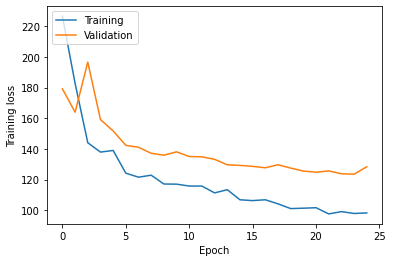

In [129]:
if __name__ == "__main__":
    plt.figure(0)
    plt.ylabel("Training loss")
    plt.xlabel("Epoch")

    plt.figure(0)
    plt.plot(train_losses, label="Training")
    plt.plot(val_losses, label="Validation")
    plt.legend(loc="upper left")